In [20]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd

In [21]:
# '10172_1000175_0000' - t2
# '10172_1000175_0001' - adc
# '10172_1000175_0002' - highb

# need to check

In [22]:
# load nibabel object
path_to_im = '/raid/picai_challenge_data/nnUNet_raw_data/Task2201_picai_baseline/imagesTr/10172_1000175_0000.nii.gz'
im = nib.load(path_to_im)

In [23]:
# get voxel size
im.header['pixdim'][1:4] 

array([0.3      , 0.3      , 3.6000001], dtype=float32)

In [24]:
# get numpy array
im_npy = im.get_fdata()

In [25]:
im_npy.shape

(640, 640, 21)

(-0.5, 639.5, 639.5, -0.5)

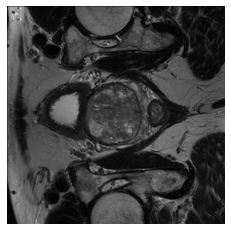

In [26]:
z_slice = 10
plt.imshow(im_npy[:, :, z_slice], cmap='gray')
plt.axis('off')

In [27]:
np.unique(im_npy)

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.262e+03, 1.264e+03,
       1.296e+03])

In [28]:
# labels
path_to_label = '/raid/picai_challenge_data/nnUNet_raw_data/Task2201_picai_baseline/labelsTr/10002_1000002.nii.gz'
label = nib.load(path_to_im)

In [29]:
label_npy = label.get_fdata()

In [30]:
label_npy.shape

(640, 640, 21)

In [32]:
label.header

### Tasks:

Images:
1. Check whether voxel space is equal between t2, adc and high for each patient
2. Find median voxel spacing for all patients
3. Test different normalization techniques


Labels:
1. Histogram of number of lesions per patients
2. Histogram of individual lesion volumes 
3. Histogram of tumor grade

## Task 1 - Images

Check whether voxel space is equal between t2, adc, and high for each patient

In [38]:
# path to all images
t2_paths = glob.glob(os.path.join('/raid/picai_challenge_data/nnUNet_raw_data/Task2201_picai_baseline/imagesTr/','*0000.nii.gz'))
ctpths = glob.glob(os.path.join('/raid/picai_challenge_data/nnUNet_raw_data/Task2201_picai_baseline/imagesTr/','*0001.nii.gz'))
highb_paths = glob.glob(os.path.join('/raid/picai_challenge_data/nnUNet_raw_data/Task2201_picai_baseline/imagesTr/','*0002.nii.gz'))

In [43]:
t2_paths[0].split('/')[-1].split('_')[0]

'10006'

In [59]:
voxel_dict = {}

In [47]:
print(len(t2_paths))
print(len(ctpths))
print(len(highb_paths))

1295
1295
1295


In [64]:
#check voxel spacing for each patient
for t2 in t2_paths:
    # get patient id
    t2_id = t2.split('/')[-1].split('_')[0]
    t2_img = nib.load(t2)
    vox = t2_img.header['pixdim'][1:4]
    voxel_dict[t2_id] = [{'t2':vox}]

In [65]:
voxel_dict

{'10006': [{'t2': array([0.5, 0.5, 3. ], dtype=float32)}],
 '10020': [{'t2': array([0.3, 0.3, 3.6], dtype=float32)}],
 '10003': [{'t2': array([0.5, 0.5, 3. ], dtype=float32)}],
 '10004': [{'t2': array([0.3, 0.3, 3.6], dtype=float32)}],
 '10017': [{'t2': array([0.5, 0.5, 3. ], dtype=float32)}],
 '10047': [{'t2': array([0.5, 0.5, 3. ], dtype=float32)}],
 '10033': [{'t2': array([0.5, 0.5, 3. ], dtype=float32)}],
 '10001': [{'t2': array([0.3      , 0.3      , 3.6000001], dtype=float32)}],
 '10034': [{'t2': array([0.5, 0.5, 3. ], dtype=float32)}],
 '10052': [{'t2': array([0.5, 0.5, 3. ], dtype=float32)}],
 '10016': [{'t2': array([0.5      , 0.5      , 3.0000005], dtype=float32)}],
 '10019': [{'t2': array([0.5, 0.5, 3. ], dtype=float32)}],
 '10075': [{'t2': array([0.5, 0.5, 3.5], dtype=float32)}],
 '10024': [{'t2': array([0.5, 0.5, 3. ], dtype=float32)}],
 '10027': [{'t2': array([0.5729167, 0.5729167, 3.5      ], dtype=float32)}],
 '10038': [{'t2': array([0.5, 0.5, 3. ], dtype=float32)}],
 '

In [66]:
for ct in ctpths:
    # get patient id
    ct_id = ct.split('/')[-1].split('_')[0]
    ct_img = nib.load(ct)
    vox = ct_img.header['pixdim'][1:4]
    voxel_dict[ct_id].append({'ct':vox})
    

In [67]:
voxel_dict

{'10006': [{'t2': array([0.5, 0.5, 3. ], dtype=float32)},
  {'ct': array([0.5, 0.5, 3. ], dtype=float32)}],
 '10020': [{'t2': array([0.3, 0.3, 3.6], dtype=float32)},
  {'ct': array([0.3, 0.3, 3.6], dtype=float32)}],
 '10003': [{'t2': array([0.5, 0.5, 3. ], dtype=float32)},
  {'ct': array([0.5, 0.5, 3. ], dtype=float32)}],
 '10004': [{'t2': array([0.3, 0.3, 3.6], dtype=float32)},
  {'ct': array([0.3, 0.3, 3.6], dtype=float32)}],
 '10017': [{'t2': array([0.5, 0.5, 3. ], dtype=float32)},
  {'ct': array([0.5, 0.5, 3. ], dtype=float32)}],
 '10047': [{'t2': array([0.5, 0.5, 3. ], dtype=float32)},
  {'ct': array([0.5, 0.5, 3. ], dtype=float32)}],
 '10033': [{'t2': array([0.5, 0.5, 3. ], dtype=float32)},
  {'ct': array([0.5, 0.5, 3. ], dtype=float32)}],
 '10001': [{'t2': array([0.3      , 0.3      , 3.6000001], dtype=float32)},
  {'ct': array([0.3      , 0.3      , 3.6000001], dtype=float32)}],
 '10034': [{'t2': array([0.5, 0.5, 3. ], dtype=float32)},
  {'ct': array([0.5, 0.5, 3. ], dtype=floa

In [68]:
for highb in highb_paths:
    # get patient id
    highb_id = highb.split('/')[-1].split('_')[0]
    highb_img = nib.load(highb)
    vox = highb_img.header['pixdim'][1:4]
    voxel_dict[highb_id].append({'highb':vox})

In [69]:
voxel_dict

{'10006': [{'t2': array([0.5, 0.5, 3. ], dtype=float32)},
  {'ct': array([0.5, 0.5, 3. ], dtype=float32)},
  {'highb': array([0.5, 0.5, 3. ], dtype=float32)}],
 '10020': [{'t2': array([0.3, 0.3, 3.6], dtype=float32)},
  {'ct': array([0.3, 0.3, 3.6], dtype=float32)},
  {'highb': array([0.3, 0.3, 3.6], dtype=float32)}],
 '10003': [{'t2': array([0.5, 0.5, 3. ], dtype=float32)},
  {'ct': array([0.5, 0.5, 3. ], dtype=float32)},
  {'highb': array([0.5, 0.5, 3. ], dtype=float32)}],
 '10004': [{'t2': array([0.3, 0.3, 3.6], dtype=float32)},
  {'ct': array([0.3, 0.3, 3.6], dtype=float32)},
  {'highb': array([0.3, 0.3, 3.6], dtype=float32)}],
 '10017': [{'t2': array([0.5, 0.5, 3. ], dtype=float32)},
  {'ct': array([0.5, 0.5, 3. ], dtype=float32)},
  {'highb': array([0.5, 0.5, 3. ], dtype=float32)}],
 '10047': [{'t2': array([0.5, 0.5, 3. ], dtype=float32)},
  {'ct': array([0.5, 0.5, 3. ], dtype=float32)},
  {'highb': array([0.5, 0.5, 3. ], dtype=float32)}],
 '10033': [{'t2': array([0.5, 0.5, 3. ],

In [113]:
len(voxel_dict)

1273

In [74]:
# all paths 
all_paths = glob.glob(os.path.join('/raid/picai_challenge_data/nnUNet_raw_data/Task2201_picai_baseline/imagesTr/','*.nii.gz'))

In [75]:
all_paths

['/raid/picai_challenge_data/nnUNet_raw_data/Task2201_picai_baseline/imagesTr/10027_1000027_0002.nii.gz',
 '/raid/picai_challenge_data/nnUNet_raw_data/Task2201_picai_baseline/imagesTr/10006_1000006_0000.nii.gz',
 '/raid/picai_challenge_data/nnUNet_raw_data/Task2201_picai_baseline/imagesTr/10020_1000020_0000.nii.gz',
 '/raid/picai_challenge_data/nnUNet_raw_data/Task2201_picai_baseline/imagesTr/10004_1000004_0001.nii.gz',
 '/raid/picai_challenge_data/nnUNet_raw_data/Task2201_picai_baseline/imagesTr/10006_1000006_0001.nii.gz',
 '/raid/picai_challenge_data/nnUNet_raw_data/Task2201_picai_baseline/imagesTr/10032_1000032_0001.nii.gz',
 '/raid/picai_challenge_data/nnUNet_raw_data/Task2201_picai_baseline/imagesTr/10006_1000006_0002.nii.gz',
 '/raid/picai_challenge_data/nnUNet_raw_data/Task2201_picai_baseline/imagesTr/10003_1000003_0000.nii.gz',
 '/raid/picai_challenge_data/nnUNet_raw_data/Task2201_picai_baseline/imagesTr/10032_1000032_0002.nii.gz',
 '/raid/picai_challenge_data/nnUNet_raw_data/T

In [96]:
data_info = {}
for path in all_paths:
    data_avail = None
    img_type = path.split('/')[-1].split('_')[-1].split('.')[0]
    if img_type == '0000':
        data_avail = 'T2'
    elif img_type == '0001':
        data_avail = 'CT'
    elif img_type == '0002':
        data_avail = 'highb'
    else:
        data_avail = 'unknown'
    img_id = path.split('/')[-1].split('_')[0]
    if img_id in data_info:
        data_info[img_id].append(path)
    else:
        data_info[img_id] = [path]
    

In [97]:
data_info

{'10027': ['/raid/picai_challenge_data/nnUNet_raw_data/Task2201_picai_baseline/imagesTr/10027_1000027_0002.nii.gz',
  '/raid/picai_challenge_data/nnUNet_raw_data/Task2201_picai_baseline/imagesTr/10027_1000027_0000.nii.gz',
  '/raid/picai_challenge_data/nnUNet_raw_data/Task2201_picai_baseline/imagesTr/10027_1000027_0001.nii.gz'],
 '10006': ['/raid/picai_challenge_data/nnUNet_raw_data/Task2201_picai_baseline/imagesTr/10006_1000006_0000.nii.gz',
  '/raid/picai_challenge_data/nnUNet_raw_data/Task2201_picai_baseline/imagesTr/10006_1000006_0001.nii.gz',
  '/raid/picai_challenge_data/nnUNet_raw_data/Task2201_picai_baseline/imagesTr/10006_1000006_0002.nii.gz'],
 '10020': ['/raid/picai_challenge_data/nnUNet_raw_data/Task2201_picai_baseline/imagesTr/10020_1000020_0000.nii.gz',
  '/raid/picai_challenge_data/nnUNet_raw_data/Task2201_picai_baseline/imagesTr/10020_1000020_0001.nii.gz',
  '/raid/picai_challenge_data/nnUNet_raw_data/Task2201_picai_baseline/imagesTr/10020_1000020_0002.nii.gz'],
 '10004

In [99]:
voxel_data = {}
for key, paths in data_info.items():
    voxels = []
    for path in paths:
        img = nib.load(path)
        vox = img.header['pixdim'][1:4]
        voxels.append(vox)
    voxel_data[key] = voxels

In [100]:
voxel_data

{'10027': [array([0.5729167, 0.5729167, 3.5      ], dtype=float32),
  array([0.5729167, 0.5729167, 3.5      ], dtype=float32),
  array([0.5729167, 0.5729167, 3.5      ], dtype=float32)],
 '10006': [array([0.5, 0.5, 3. ], dtype=float32),
  array([0.5, 0.5, 3. ], dtype=float32),
  array([0.5, 0.5, 3. ], dtype=float32)],
 '10020': [array([0.3, 0.3, 3.6], dtype=float32),
  array([0.3, 0.3, 3.6], dtype=float32),
  array([0.3, 0.3, 3.6], dtype=float32)],
 '10004': [array([0.3, 0.3, 3.6], dtype=float32),
  array([0.3, 0.3, 3.6], dtype=float32),
  array([0.3, 0.3, 3.6], dtype=float32)],
 '10032': [array([0.5, 0.5, 3. ], dtype=float32),
  array([0.5, 0.5, 3. ], dtype=float32),
  array([0.5, 0.5, 3. ], dtype=float32)],
 '10003': [array([0.5, 0.5, 3. ], dtype=float32),
  array([0.5, 0.5, 3. ], dtype=float32),
  array([0.5, 0.5, 3. ], dtype=float32)],
 '10014': [array([0.3      , 0.3      , 3.6000001], dtype=float32),
  array([0.3      , 0.3      , 3.6000001], dtype=float32),
  array([0.3      , 0

In [110]:
bool_voxels = {}
non_equal_voxels = {}
for key, voxels in voxel_data.items():
    vox_equal = all(np.array_equal(voxel, voxels[0]) for voxel in voxels)
    bool_voxels[key] = vox_equal
    if vox_equal == False:
        non_equal_voxels[key] = voxels

In [111]:
bool_voxels

{'10027': True,
 '10006': True,
 '10020': True,
 '10004': True,
 '10032': True,
 '10003': True,
 '10014': True,
 '10017': True,
 '10033': True,
 '10047': True,
 '10001': True,
 '10048': True,
 '10000': True,
 '10034': True,
 '10052': True,
 '10031': True,
 '10016': True,
 '10075': True,
 '10019': True,
 '10038': True,
 '10024': True,
 '10011': True,
 '10039': True,
 '10010': True,
 '10040': True,
 '10049': True,
 '10054': True,
 '10026': True,
 '10043': True,
 '10035': True,
 '10023': True,
 '10056': True,
 '10071': True,
 '10138': True,
 '10117': True,
 '10078': True,
 '10063': True,
 '10141': True,
 '10090': True,
 '10060': True,
 '10152': True,
 '10059': True,
 '10122': True,
 '10079': True,
 '10022': True,
 '10126': True,
 '10076': True,
 '10108': True,
 '10072': True,
 '10097': True,
 '10096': True,
 '10070': True,
 '10081': True,
 '10045': True,
 '10153': True,
 '10062': True,
 '10087': True,
 '10107': True,
 '10098': True,
 '10160': True,
 '10183': True,
 '10162': True,
 '10217'

In [112]:
non_equal_voxels

{'10281': [array([0.3422619, 0.3422619, 2.9999998], dtype=float32),
  array([0.3422619, 0.3422619, 3.       ], dtype=float32),
  array([0.3422619, 0.3422619, 2.9999998], dtype=float32),
  array([0.3422619, 0.3422619, 2.9999998], dtype=float32),
  array([0.3422619, 0.3422619, 3.       ], dtype=float32),
  array([0.3422619, 0.3422619, 3.       ], dtype=float32)],
 '10540': [array([0.3422619, 0.3422619, 3.       ], dtype=float32),
  array([0.3422619, 0.3422619, 3.       ], dtype=float32),
  array([0.3422619, 0.3422619, 3.0000002], dtype=float32),
  array([0.3422619, 0.3422619, 3.       ], dtype=float32),
  array([0.3422619, 0.3422619, 3.0000002], dtype=float32),
  array([0.3422619, 0.3422619, 3.0000002], dtype=float32)],
 '10936': [array([0.3422619, 0.3422619, 2.9999998], dtype=float32),
  array([0.3422619, 0.3422619, 3.       ], dtype=float32),
  array([0.3422619, 0.3422619, 3.       ], dtype=float32),
  array([0.3422619, 0.3422619, 2.9999998], dtype=float32),
  array([0.3422619, 0.34226

There are 8 patients with non equal voxel spacing. Some have smaller or larger differences

### Task 2 - Images

Find median voxel spacing for all patients

In [124]:
all_voxels = None
img_count = 0
for patient, voxels in voxel_data.items():
    for i in range(0, len(voxels)):
        img_count += 1
        if all_voxels is None:
            all_voxels = voxels[i]
        else:
            all_voxels = np.vstack((all_voxels, voxels[i]))

In [123]:
all_voxels.shape

(3885, 3)

In [125]:
img_count

3885

In [126]:
median_vox = np.median(all_voxels)

In [127]:
median_vox

0.5

In [128]:
median_ = np.median(all_voxels, axis = 0)

In [129]:
median_

array([0.5, 0.5, 3. ], dtype=float32)

### Task 1 - Labels

Histogram of number of lesions per patients

In [130]:
# get count of labeled files


In [132]:
# get clinical annotations loaded in
clinical_annot = '/raid/picai_challenge_data/picai_labels/clinical_information/marksheet.csv'

In [135]:
clinical_data = pd.read_csv(clinical_annot)

In [137]:
clinical_data['lesion_GS']

0               0+0
1               NaN
2               NaN
3               0+0
4           0+0,0+0
           ...     
1495    3+4,N/A,3+3
1496            3+4
1497            0+0
1498            3+3
1499            4+5
Name: lesion_GS, Length: 1500, dtype: object